#  Исследование данных популярного сервиса аренды самокатов GoFast

**Описание проекта:**Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Цель исследования:**
Проанализировать данные и проверить некоторые гипотезы, которые помогут помочь в развитии бизнеса

**Ход исследования:** Данные для исследования я получу из 3 файлов: "users_go.csv" ,"rides_go.csv", "subscriptions_go.csv".О качестве данных ничего не известно, поэтому перед началом исследования необходимо проверить данные.

**Общий вывод:**резюмирование полученных результатов,формулировка ключевых выводов и рекомендаций

<div class="alert alert-info"><b>Комментарий стукдента:Сделано</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 
import numpy as np
from scipy.stats import binom

#### Шаг 1. Загрузка данных

In [2]:
users=pd.read_csv('/datasets/users_go.csv')
riders=pd.read_csv("/datasets/rides_go.csv")
subscriptions=pd.read_csv("/datasets/subscriptions_go.csv")

*Посмотри первые 5 строк в каждом датасете и изучим общую информацию содержащуюся в них*

In [3]:
display(users.head())
display(riders.head())
display(subscriptions.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<div class="lert alert-info"><b>Комментарий студента:Сделано</b>

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
riders.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,18068.0,842.869936,434.734317,1.000000,487.000000,889.000000,1213.250000,1534.000000
distance,18068.0,3070.659976,1116.831209,0.855683,2543.226360,3133.609994,3776.222735,7211.007745
duration,18068.0,17.805011,6.091051,0.500000,13.597563,17.678395,21.724800,40.823963


In [7]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


*В датафреймах отсутствуют пропуски,все типы данных соответствуют их значениям ,кроме столбца "date",его необходимо преобразовать в тип данных datetime*

#### Шаг 2. Предобработка данных

In [8]:
riders['date']=pd.to_datetime(riders['date'], format='%Y-%m-%d')
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [9]:
dataframes=[users,riders,subscriptions]

In [10]:
def check_dataframes(dataframes):
    results={}
    for i ,df in enumerate(dataframes):
        duplicates=df.duplicated().sum()
        missing_values=df.isnull().sum()
        results[f'DataFrame_{i+1}']={'duplicates': duplicates,
                                    'missing_values': missing_values
                                    }
    return results

results=check_dataframes(dataframes)
print(results)

{'DataFrame_1': {'duplicates': 31, 'missing_values': user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64}, 'DataFrame_2': {'duplicates': 0, 'missing_values': user_id     0
distance    0
duration    0
date        0
dtype: int64}, 'DataFrame_3': {'duplicates': 0, 'missing_values': subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64}}


*Пропуски в данных отсутствуют,а вот дубликаты - нет*

In [11]:
duplicated=users[users.duplicated()]
duplicated

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


*Дубликатов не много , поэтому их можно удалить*

In [12]:
users=users.drop_duplicates()
users.duplicated().sum()

0

**Создадим новый столбец с номером месяца**

In [13]:
riders['month']=riders['date'].dt.month
riders

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


In [14]:
users

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


*На данном этапе мы проверили данные на наличие пропусков и дубликатов, заменили тип данных  столбце с датой , чтоб в дальнейшем было легче работать с данными этого столбца, добавили столбец с номерм месяца,упростив себе дальнейшее исследование.*

#### Шаг 3. Исследовательский анализ данных

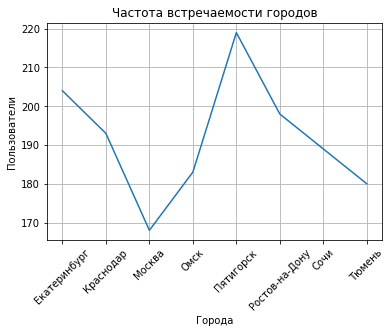

,city,user_id
4,Пятигорск,219
0,Екатеринбург,204
5,Ростов-на-Дону,198
1,Краснодар,193
6,Сочи,189
3,Омск,183
7,Тюмень,180
2,Москва,168


In [15]:
city=users.pivot_table(index='city', values='user_id', aggfunc='count').reset_index()

sns.lineplot(data=city,x='city', y='user_id')
plt.title('Частота встречаемости городов')
plt.xlabel('Города')
plt.ylabel('Пользователи')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
city.sort_values(by='user_id',ascending=False)

*График показывает что кол-во пользователей преобладает в Пятигорске*

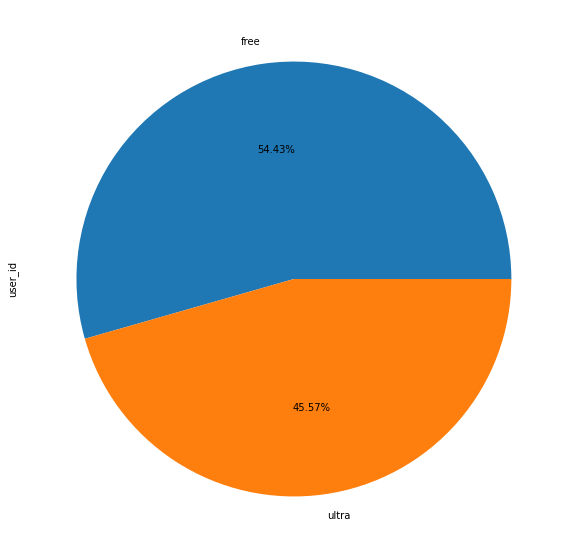

In [16]:
subscrip=users.groupby('subscription_type')['user_id'].count()
ax=subscrip.plot.pie(figsize=(10,10),autopct='%.2f%%')



*Колличество пользователей с подпиской выше*

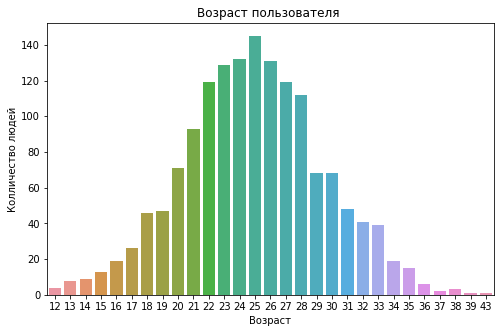

In [17]:
age=users.pivot_table(index='age', values='user_id', aggfunc='count').reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='age', y='user_id', data=age)
plt.title('Возраст пользователя ')
plt.xlabel('Возраст')
plt.ylabel('Колличество людей')
plt.show()

*Основная часть пользователей от 22 до 28 лет*

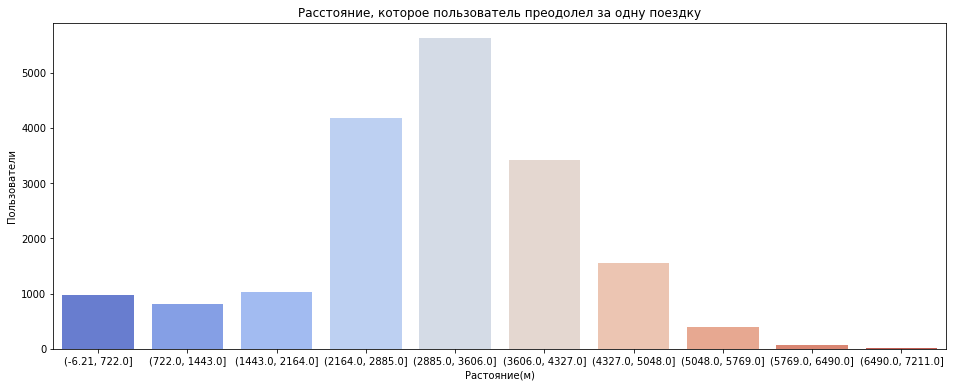

In [18]:
riders['distance']=riders['distance'].round()
riders['distance_bins']=pd.cut(riders['distance'], bins=10)
distance=riders.pivot_table(index='distance_bins',values='user_id', aggfunc='count').reset_index()

plt.figure(figsize=(16,6))
sns.barplot(x='distance_bins',y='user_id', data=distance, palette='coolwarm')
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Растояние(м)')
plt.ylabel('Пользователи')
plt.show()

*От 2100 до 4300 м проезжают пользователи*

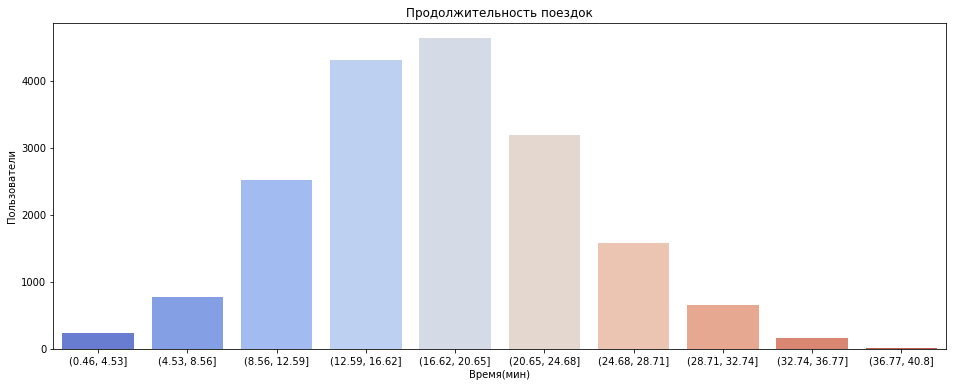

In [19]:
riders['duration']=riders['duration'].round(1)
riders['duration_bins']=pd.cut(riders['duration'], bins=10)
distance=riders.pivot_table(index='duration_bins',values='user_id', aggfunc='count').reset_index()

plt.figure(figsize=(16,6))
sns.barplot(x='duration_bins',y='user_id', data=distance, palette='coolwarm')
plt.title('Продолжительность поездок')
plt.xlabel('Время(мин)')
plt.ylabel('Пользователи')
plt.show()

*Большая часть данных показывет что время поездки от 8.56 до 24.68*

**Исходя из исследования данных, можно сделать небольшой вывод о том что большая часть пользователей находится в г.Пятигорске,от 22 до 28 лет,около 53% из них не пользуется подпиской ,проезжают расстояние от 2100 до 4300 м и время поездки от 8,56 до 24,68 минут** 

#### Шаг 4. Объединение данных

In [20]:
users.shape

(1534, 5)

In [21]:
riders.shape

(18068, 7)

*Объединим все датафреймы в один*

In [22]:
df=users.merge(riders,on='user_id',how='right')
df=df.merge(subscriptions,on='subscription_type',how ='left')
df

,user_id,name,age,city,subscription_type,distance,duration,date,month,distance_bins,duration_bins,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,25.6,2021-01-01,1,"(4327.0, 5048.0]","(24.68, 28.71]",6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,15.8,2021-01-18,1,"(2164.0, 2885.0]","(12.59, 16.62]",6,0,199
2,1,Кира,22,Тюмень,ultra,754.0,6.2,2021-04-20,4,"(722.0, 1443.0]","(4.53, 8.56]",6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,18.5,2021-08-11,8,"(2164.0, 2885.0]","(16.62, 20.65]",6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,26.3,2021-08-28,8,"(3606.0, 4327.0]","(24.68, 28.71]",6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.0,19.8,2021-11-04,11,"(3606.0, 4327.0]","(16.62, 20.65]",8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.0,21.4,2021-11-16,11,"(2164.0, 2885.0]","(20.65, 24.68]",8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.0,18.4,2021-11-18,11,"(3606.0, 4327.0]","(16.62, 20.65]",8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.0,16.7,2021-11-27,11,"(2885.0, 3606.0]","(16.62, 20.65]",8,50,0


In [23]:
df.shape

(18068, 14)

In [24]:
df.isnull().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
distance_bins        0
duration_bins        0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [25]:
ultra=df.query('subscription_type=="ultra"')
free=df.query('subscription_type=="free"')

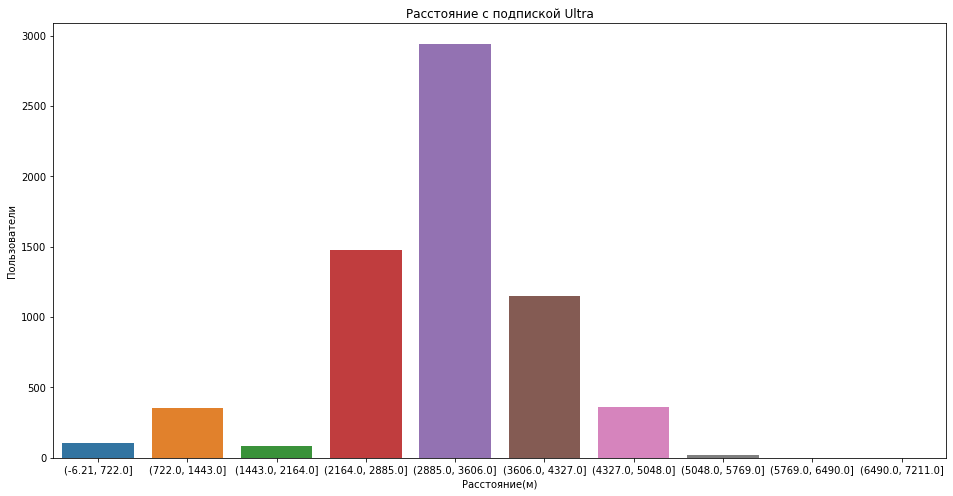

In [26]:
ultra_schedule = ultra.groupby('distance_bins')['user_id'].count().reset_index()

plt.figure(figsize=(16,8))
sns.barplot(x='distance_bins',y='user_id',data=ultra_schedule)
plt.xlabel('Расстояние(м)')
plt.ylabel('Пользователи')
plt.title('Расстояние с подпиской Ultra')
plt.show()

*С большая часть людей с подпиской  проезжают от 2885 до 3606 м*

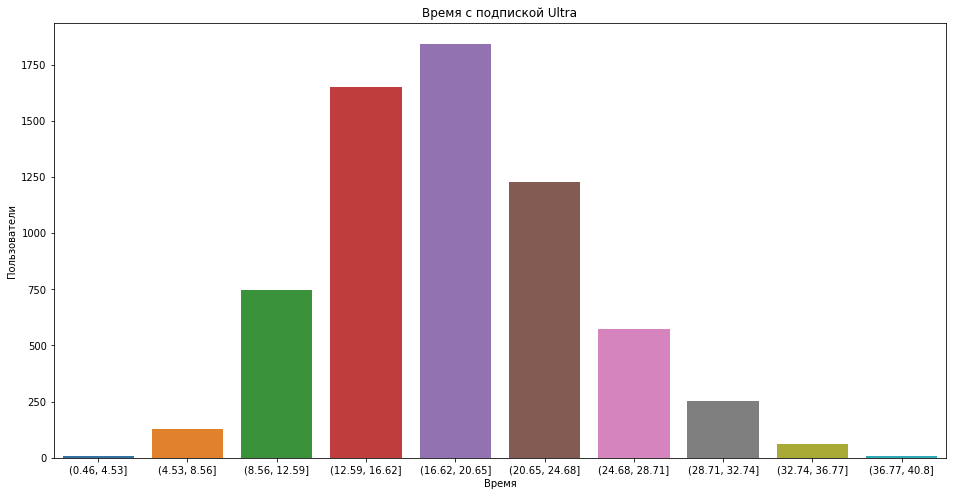

In [27]:
ultra_schedule = ultra.groupby('duration_bins')['user_id'].count().reset_index()

plt.figure(figsize=(16,8))
sns.barplot(x='duration_bins',y='user_id',data=ultra_schedule)
plt.xlabel('Время')
plt.ylabel('Пользователи')
plt.title('Время с подпиской Ultra')
plt.show()

*От 12.59 до 24.68 минут тратит на поездки большая часть лдей с подпиской*

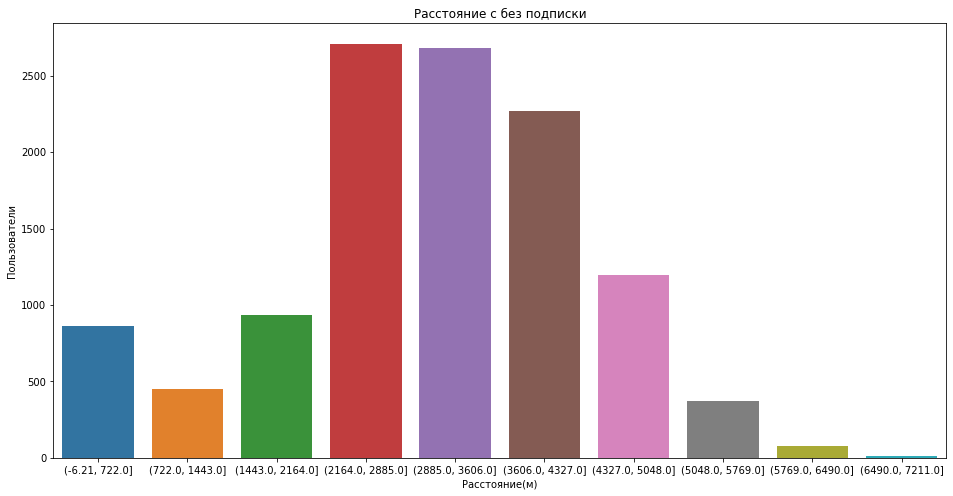

In [28]:
free_schedule = free.groupby('distance_bins')['user_id'].count().reset_index()

plt.figure(figsize=(16,8))
sns.barplot(x='distance_bins',y='user_id',data=free_schedule)
plt.xlabel('Расстояние(м)')
plt.ylabel('Пользователи')
plt.title('Расстояние с без подписки')
plt.show()

*Без подписки люди проезжают от 2164 до 4327 м*

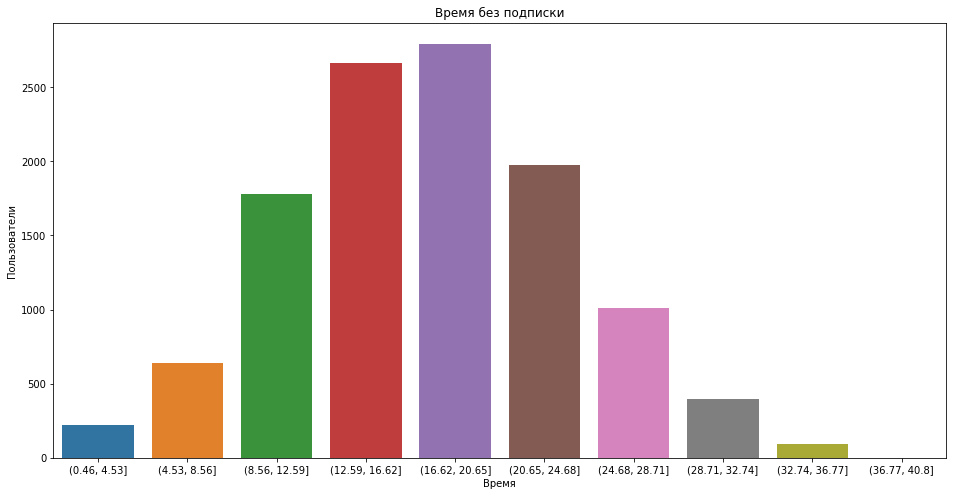

In [29]:
free_schedule = free.groupby('duration_bins')['user_id'].count().reset_index()

plt.figure(figsize=(16,8))
sns.barplot(x='duration_bins',y='user_id',data=free_schedule)
plt.xlabel('Время')
plt.ylabel('Пользователи')
plt.title('Время без подписки')
plt.show()

*От 8.56 до 24.68 минут тратят на поездку люди без подписки*

**Общий вывод на основе данных по графикам: С большая часть людей с подпиской проезжают от 2885 до 3606 метров и тратят на это от 12.59 до 24.68 минут.
Без подписки люди проезжают от 2164 до 4327 метров и тратят от 8.56 до 24.68 минут**

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Выводы верны, визуализация корректная. Здорово, что есть сравнения профилей пользователей двух категорий.
</div>

#### Шаг 5. Подсчёт выручки

In [30]:
df

,user_id,name,age,city,subscription_type,distance,duration,date,month,distance_bins,duration_bins,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,25.6,2021-01-01,1,"(4327.0, 5048.0]","(24.68, 28.71]",6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,15.8,2021-01-18,1,"(2164.0, 2885.0]","(12.59, 16.62]",6,0,199
2,1,Кира,22,Тюмень,ultra,754.0,6.2,2021-04-20,4,"(722.0, 1443.0]","(4.53, 8.56]",6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,18.5,2021-08-11,8,"(2164.0, 2885.0]","(16.62, 20.65]",6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,26.3,2021-08-28,8,"(3606.0, 4327.0]","(24.68, 28.71]",6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.0,19.8,2021-11-04,11,"(3606.0, 4327.0]","(16.62, 20.65]",8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.0,21.4,2021-11-16,11,"(2164.0, 2885.0]","(20.65, 24.68]",8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.0,18.4,2021-11-18,11,"(3606.0, 4327.0]","(16.62, 20.65]",8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.0,16.7,2021-11-27,11,"(2885.0, 3606.0]","(16.62, 20.65]",8,50,0


In [31]:
df['duration']=np.ceil(df['duration'])

In [32]:
df_group=df.groupby(['user_id', 'month']).agg({
    'distance': ['sum','count'],
    'duration': 'sum',
    'subscription_type': 'first',
    'minute_price':'first',
    'start_ride_price': 'first',
    'subscription_fee':'first',
}).reset_index()
df_group.columns=['user_id','month','total_distance','count','total_duration','subscription_type','minute_price','start_ride_price','subscription_fee']
df_group

,user_id,month,total_distance,count,total_duration,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7028.0,2,42.0,ultra,6,0,199
1,1,4,754.0,1,7.0,ultra,6,0,199
2,1,8,6724.0,2,46.0,ultra,6,0,199
3,1,10,5810.0,2,32.0,ultra,6,0,199
4,1,11,7004.0,3,55.0,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.0,2,26.0,free,8,50,0
11327,1534,8,7623.0,2,48.0,free,8,50,0
11328,1534,9,4928.0,1,23.0,free,8,50,0
11329,1534,11,13349.0,4,78.0,free,8,50,0


In [33]:
df_group['monthly_revenue']=(
    df_group['start_ride_price']
    *df_group['count']
    +df_group['minute_price']
    *df_group['total_duration']
)
df_group.loc[df_group['subscription_fee']>0,'monthly_revenue']+=df_group['subscription_fee']
df_group

,user_id,month,total_distance,count,total_duration,subscription_type,minute_price,start_ride_price,subscription_fee,monthly_revenue
0,1,1,7028.0,2,42.0,ultra,6,0,199,451.0
1,1,4,754.0,1,7.0,ultra,6,0,199,241.0
2,1,8,6724.0,2,46.0,ultra,6,0,199,475.0
3,1,10,5810.0,2,32.0,ultra,6,0,199,391.0
4,1,11,7004.0,3,55.0,ultra,6,0,199,529.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.0,2,26.0,free,8,50,0,308.0
11327,1534,8,7623.0,2,48.0,free,8,50,0,484.0
11328,1534,9,4928.0,1,23.0,free,8,50,0,234.0
11329,1534,11,13349.0,4,78.0,free,8,50,0,824.0


In [34]:
df_group['subscription_type'].isna().sum()

0

#### Шаг 6. Проверка гипотез

*Проверим гипотезу о том, что время потраченное на поездку не меняется в зависимости от подписки: H0-среднее время поездки у пользователей с подпиской не отличается от среднего времени поездки у пользователей без подписки, H1-Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки.*

In [35]:
subscribe=df[df['subscription_type']=='ultra']['duration']
non_subscribe=df[df['subscription_type']=='free']['duration']

alpha=0.05

result=st.ttest_ind(subscribe,non_subscribe,alternative='greater')
print('p-значение:',result.pvalue)

if result.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 2.0838953951757965e-34
Отвергаем нулевую гипотезу


*р-Значение меньше уровня значимости,это значит что стоит отвергнуть нулевую гипотезу, среднее время поездки у пользователей с подпиской больше среднего времени поездки у полдьзователей без подписки*

6.2 Расстояние одной поездки в
3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

*Нулевая гипотеза-Расстояние,пройденное пользователем за одну поездку, не больше 3130 метров.
Альтернативная гипотеза-Расстояние,пройденное пользователем за одну поездку, больше 3130 метров*

In [36]:
subscribe=df[df['subscription_type']=='ultra']['distance']

interested_value=3130

alpha=0.05

result=st.ttest_1samp(subscribe,interested_value,alternative='greater')
print('p-значение:',result.pvalue)

if result.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 0.9195649894697724
Нет оснований отвергнуть нулевую гипотезу


*р-значение больше уровня значимости , поэтому можно сказать что нет оснований отвергнуть нулевую гипотезу-расстояние пройденное пользователем за одну поездку, не больше 3130 метров*

6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

*Нулевая гипотеза-Помесячная выручка от пользователей с подпиской равна помесячной выручке пользователей без подписки.
Альтернативная гипотеза-Помесячная выручка от пользователей с подпиской  выше,чем помесячная выручка пользователей без подписки.*

In [37]:
subscribe=df_group[df_group['subscription_type']=='ultra']['monthly_revenue']
non_subscribe=df_group[df_group['subscription_type']=='free']['monthly_revenue']

alpha=0.05

result=st.ttest_ind(subscribe,non_subscribe,alternative='greater')
print('p-значение:',result.pvalue)

if result.pvalue<alpha:
     print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 5.015631474144602e-32
Отвергаем нулевую гипотезу


*Помесячная выручка от пользователей с подпиской  выше,чем выручка от пользователей без подписки*

*Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?*

**Ответ:Даны две зависимые выборки,до обновления и после, соответственно мы воспользуемся st.ttest_rel.Использовать мы будем одностороннюю гипотезу с параметром alternative='less'.Нулевая гипотеза- после обновления колличество обращений в техподдержку не изменилось.Альтернативная -после обновления колличество обращений меньше**

*Мы провели несколько тестов с разными гипотезами и по ним можно сделать такой вывод:Время поездки с подпиской и без отличается пользователи с подпиской проезжают в среднем не больше 3130 м;выручка пользователей с подпиской выше-нужно как-то привлечь людей без подписки ее оформить.*

#### Шаг 7. Распределения

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность открытия сообщений равна: 15.37 %


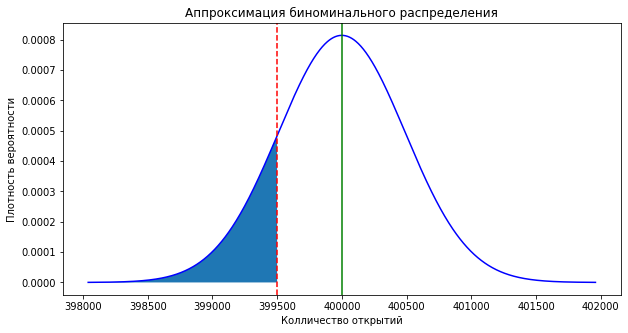

In [38]:
p=0.4
n=1000000
k=399500

mu=p*n
sigma=(n*p*(1-p))**0.5

distr=st.norm(mu,sigma)

result=distr.cdf(k)

print('Вероятность открытия сообщений равна:',(result*100).round(2),'%')

x=np.linspace(mu-4*sigma,mu+4*sigma,1000)
y=st.norm.pdf(x,mu,sigma)
plt.figure(figsize=(10,5))
plt.plot(x,y, label='Нормальное распределение',color='blue')
plt.fill_between(x, y, where=(x<=k))
plt.axvline(x=k, color='red',linestyle='dashed')
plt.axvline(x=mu, color='green')
plt.xlabel('Колличество открытий')
plt.ylabel('Плотность вероятности')
plt.title('Аппроксимация биноминального распределения')
plt.show()

*вероятность того, что уведомление откроют не более 399,5 тыс. пользователей=15.37%*

***Итоговый отчет по исследованию данных популярного сервиса аренды самокатов GoFast ***

*Цель исследования:*Проанализировать данные и проверить некоторые гипотезы, которые помогут помочь в развитии бизнеса

*Ключевые этапы исследования:*

1.Больше всего пользователей на Юге страны 219

2.Доля пользователей с подкиской 45%

3.Средний возраст пользователя 25 лет

4.Среднее расстояние которое проезжает пользователь с подпиской-от 2885 до 3606 м, без подписки-от 2164 до 4327

5.Среднее время ,которое пользователь с подпиской тратит на поездку - от 12.59 до 24.68, без подписки- от 8.56 до 24.68 

6.Среднее расстояние которое проехал пользователь с подпиской не привышает оптимальное расстояние износа самоката в 3130 метров

7.Среднее время поездки у пользователя с подпиской выше, чем у пользователя без подписки

8.Помесячная выручка у от пользователей с подпиской выше . чем без подписки

**Рекомендации для бизнеса:**

Пользователи с подпиской являются более выгодными клиентами для сервиса аренды самокатов, в связи с этим руководству сервиса желательно принять меры для перехода клиентов на подписку.